In [1]:
import pandas as pd

# Load the dataset
file_path = 'FINAL_WoodBuffalo2019_Dataset.csv'  # Update the path as needed
data = pd.read_csv(file_path)

# Display basic info about the dataset
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Terrain_Aspect                     332 non-null    object 
 1   Average_Soil_Sand_Percentage       332 non-null    float64
 2   Average_Soil_Clay_Percentage       332 non-null    float64
 3   Average_Soil_Silt_Percentage       332 non-null    float64
 4   Burn_Treatment                     332 non-null    object 
 5   Vegetation_Type                    332 non-null    object 
 6   Thermo_Mid_Max                     332 non-null    float64
 7   Thermo_Low_Max                     332 non-null    float64
 8   Soil_Texture                       332 non-null    object 
 9   Slope_Position                     332 non-null    object 
 10  Organic_Horizon_Thickness_cm       332 non-null    float64
 11  Pre_Horizon_Wet_Mass_g             332 non-null    float64

In [2]:
# Convert non-numeric columns to numeric, coercing errors to NaN
columns_to_convert = [
    'Fraction_Horizon_Dry_Mass_Loss', 'Dry_Horizon_Mass_Loss_g', 
    'Pre_Horizon_Moisture_Percentage'
]
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values in the relevant features
data_clean = data.dropna(subset=columns_to_convert)


In [3]:
from sklearn.preprocessing import StandardScaler

# Select relevant features
features = [
    'Thermo_Mid_Max', 'Thermo_Low_Max', 
    'Pre_Horizon_Moisture_Percentage', 'Pre_Core_Wet_Mass_g', 'Post_Core_Wet_Mass_g',
    'Organic_Horizon_Thickness_cm', 'Pre_Horizon_Thickness_cm', 'Horizon_Thickness_Loss_cm',
    'Dry_Horizon_Mass_Loss_g', 'Fraction_Core_Dry_Mass_Loss', 'Fraction_Horizon_Dry_Mass_Loss'
]

# Subset the data
data_features = data_clean[features]

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)


In [4]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust the number of clusters as needed
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original data
data_clean['Cluster'] = clusters


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_34668\1175583867.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cluster'] = clusters


In [5]:
import pandas as pd
import numpy as np
import sklearn
from scipy import stats
import matplotlib.pyplot as plt
import os
import seaborn as sns

C:\Users\DELL\AppData\Local\Temp\ipykernel_34668\440168564.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cluster'] = data_clean['Cluster'].map(cluster_mapping)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


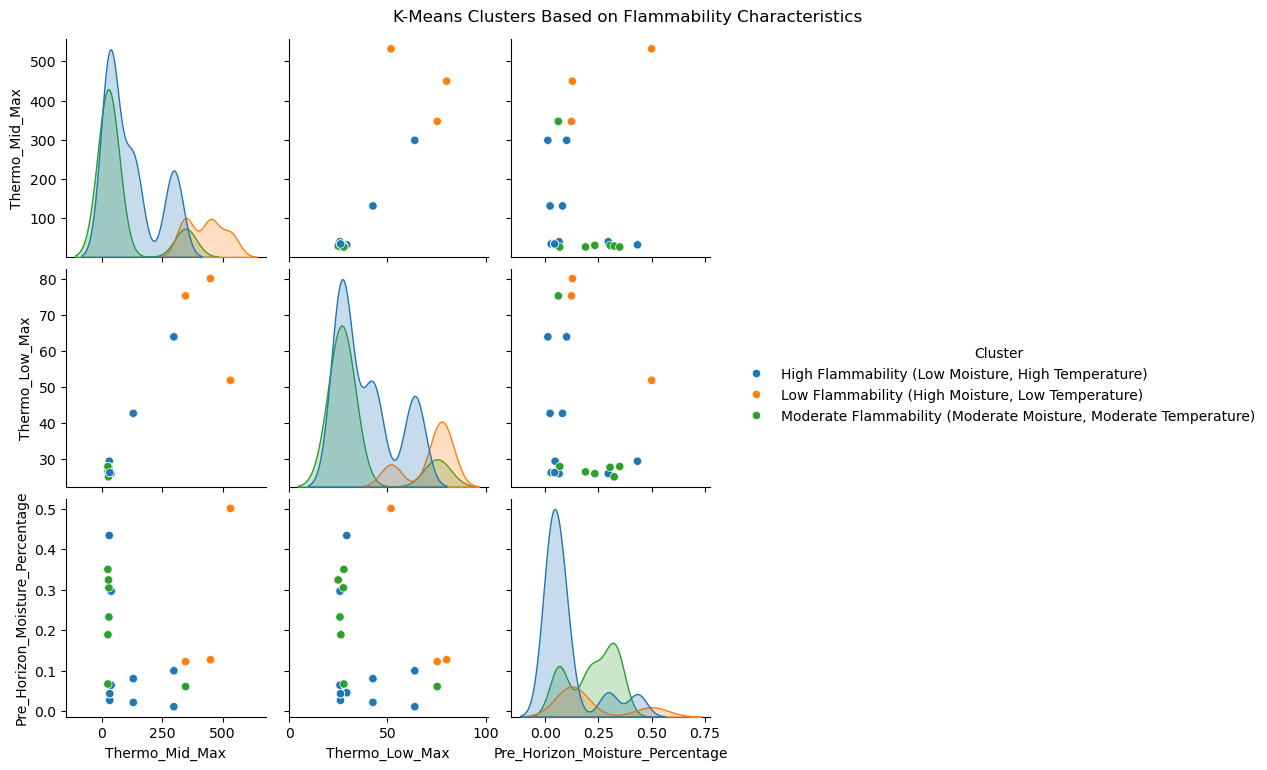

In [6]:
# Create a mapping of cluster numbers to descriptive names
cluster_mapping = {
    0: 'Low Flammability (High Moisture, Low Temperature)',
    1: 'Moderate Flammability (Moderate Moisture, Moderate Temperature)',
    2: 'High Flammability (Low Moisture, High Temperature)'
}

# Replace cluster numbers with descriptive names
data_clean['Cluster'] = data_clean['Cluster'].map(cluster_mapping)

# Visualize clusters with descriptive names
sns.pairplot(data_clean, 
             vars=['Thermo_Mid_Max', 'Thermo_Low_Max', 'Pre_Horizon_Moisture_Percentage'], 
             hue='Cluster', palette='tab10')
plt.suptitle('K-Means Clusters Based on Flammability Characteristics', y=1.02)
plt.show()


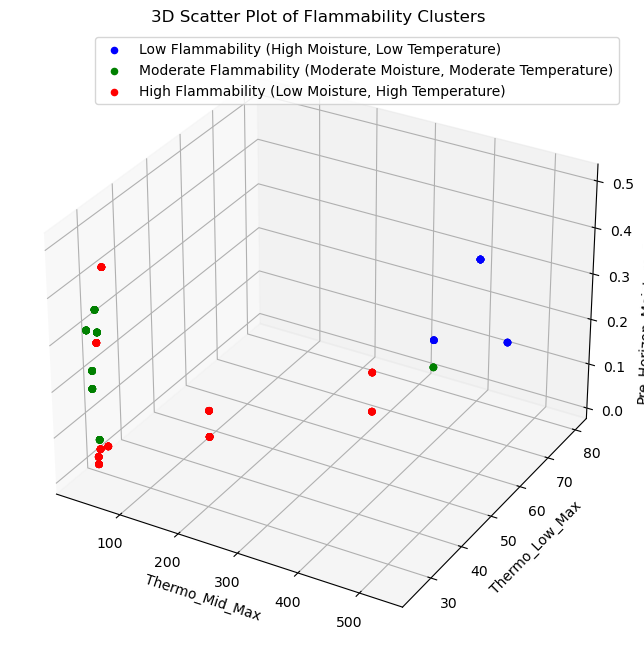

In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
colors = {'Low Flammability (High Moisture, Low Temperature)': 'blue',
          'Moderate Flammability (Moderate Moisture, Moderate Temperature)': 'green',
          'High Flammability (Low Moisture, High Temperature)': 'red'}

for cluster, color in colors.items():
    subset = data_clean[data_clean['Cluster'] == cluster]
    ax.scatter(subset['Thermo_Mid_Max'], subset['Thermo_Low_Max'], subset['Pre_Horizon_Moisture_Percentage'], 
               label=cluster, color=color)

ax.set_xlabel('Thermo_Mid_Max')
ax.set_ylabel('Thermo_Low_Max')
ax.set_zlabel('Pre_Horizon_Moisture_Percentage')
plt.legend()
plt.title('3D Scatter Plot of Flammability Clusters')
plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\DELL\AppData\Local\Temp\ipykernel_34668\3769237249.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean['Cluster'] = clusters
C:\Users\DELL\AppData\Local\Temp\ipykernel_3466

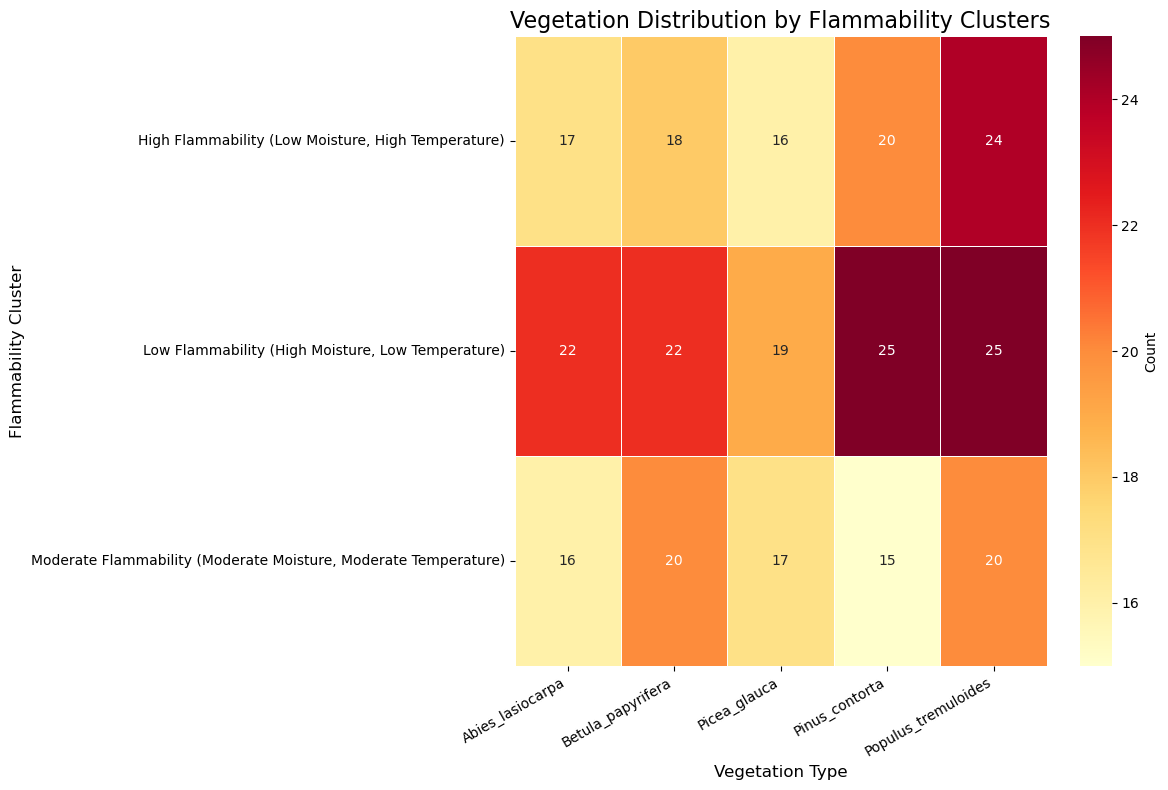

In [8]:
# Reimport necessary libraries after environment reset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reload the dataset (please upload if required again)
file_path = 'FINAL_WoodBuffalo2019_Dataset.csv'
data = pd.read_csv(file_path)

# Convert non-numeric columns to numeric, coercing errors to NaN
columns_to_convert = [
    'Fraction_Horizon_Dry_Mass_Loss', 'Dry_Horizon_Mass_Loss_g', 
    'Pre_Horizon_Moisture_Percentage', 'Thermo_Mid_Max', 'Thermo_Low_Max'
]
for col in columns_to_convert:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values in the relevant features
data_clean = data.dropna(subset=columns_to_convert)

# Select relevant features for clustering
features = [
    'Thermo_Mid_Max', 'Thermo_Low_Max', 
    'Pre_Horizon_Moisture_Percentage'
]
data_features = data_clean[features]

# Apply clustering process again if required
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_features)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Add cluster labels to the original data
data_clean['Cluster'] = clusters

# Map clusters to descriptive names
cluster_mapping = {
    0: 'Low Flammability (High Moisture, Low Temperature)',
    1: 'Moderate Flammability (Moderate Moisture, Moderate Temperature)',
    2: 'High Flammability (Low Moisture, High Temperature)'
}
data_clean['Cluster'] = data_clean['Cluster'].map(cluster_mapping)

# Create a heatmap to visualize vegetation type distribution across flammability clusters
heatmap_data = data_clean.groupby(['Cluster', 'Vegetation_Type']).size().unstack()

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt="d",
    cmap="YlOrRd",
    linewidths=0.5,
    cbar_kws={'label': 'Count'}
)

# Customize the plot
plt.title('Vegetation Distribution by Flammability Clusters', fontsize=16)
plt.xlabel('Vegetation Type', fontsize=12)
plt.ylabel('Flammability Cluster', fontsize=12)
plt.xticks(rotation=30, ha='right', fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()
